#Análisis de bifurcación y control de caos del circuito de Chua modificado
#Juan Jacobo González Herrera (1006228229)

Este trabajo tiene como objetivo replicar y complementar las simulaciones numéricas del artículo científico "Bifurcation analysis and chaos control of the modified Chua’s circuit system" escrito por Jihua Yang y Liqin Zhao, disponible en ScienceDirect: [Link del artículo](https://www.sciencedirect.com/science/article/abs/pii/S0960077915001642).

**Resumen**

Desde el punto de vista de la bifurcación y el control del caos, la dinámica del circuito de Chua modificado se investiga mediante un método de retroalimentación retardada. Primero, se discute la estabilidad local del equilibrio analizando la distribución de las raíces asociadas con la ecuación característica. Las regiones de estabilidad lineal de equilibrio son dadas. Se encuentra que existe bifurcación Hopf cuando el retraso pasa a través de una secuencia de valores críticos. Al usar el método de la forma normal y la teoría de la variedad central, se derivan las fórmulas explícitas para determinar la dirección y estabilidad de la bifurcación Hopf. Finalmente, la oscilación caótica es convertida en un equilibrio estable o una órbita periódica estable al diseñar una fuerza de retroalimentación y un retraso apropiados. Se realizaron simulaciones numéricas para demostrar los resultados analíticos.

**Palabras clave**

Estabilidad, Bifurcación Hopf, Control de caos.

**Introducción**

Un sistema caótico es un sistema determinístico con gran sensibilidad a las condiciones iniciales. Las dinámicas en un sistema caótico no pueden ser encontradas de forma precisa debido a sus complicaciones e incertidumbre. Si el caos no puede ser controlado, esto podría llevar a un colapso del sistema dinámico. Intereses recientes han llevado a controlar un sistema caótico. En general, el control intenta estabilizar un atractor de caos ya sea a una órbita periódica o a un equilibrio. 

Recientemente se han propuesto varias estrategias para estabilizar el caos. Hay dos acercamientos para esto, el primero desarrollado por Ott et al. y el segundo propuesto por Pyragas usando fuerzas de control retrasadas. En contraste con el primero ya formalizado, el segundo es un método simple y conveniente para controlar caos en un sistema dinámico continuo. Por lo tanto, se adopta el segundo en este documento.

El circuito de Chua modificado ha sido estudiado extensivamente como un sistema electrónico prototipo. Su estructura es simple pero puede producir fenómenos dinámicos complejos como el caos. El circuito de Chua original contiene un resistor lineal definido a trozos. Hartley sugirió reemplazar el resistor por un polinomio cúbico sin cambios mayores en las características dinámicas del sistema. Para el control de caos del sistema circuital de Chua, hay una gran cantidad de excelentes trabajos. Por ejemplo, Chen et al. dio la antisincronización global de los circuitos caóticos modificados de Chua a través del control de retroalimentación lineal. Yassen introdujo un método de control simple y adaptativo para resolver los problemas de sincronización y control y aplicarlos para suprimir el caos a uno de los tres estados estacionarios. Xu y Yu estudiaron las posiciones, número y estabilidad local del equilibrio. También diseñaron leyes de control simple para estabilizar cualquier equilibrio dado exponencialmente. Tang y Wang propusieron un método de control adaptativo para sincronizar el circuito de Chua modificado con parámetros desconocidos, el cual tiene la siguiente forma:

$$
\dot{x} = \alpha (y-ax-bx^2-cx^3)
$$

$$
\dot{y} = x-y+z
$$

$$
\dot{z} = -\beta y
$$

en donde $x$ y $y$ son los voltajes a través de los capacitores, $z$ es la corriente a través del inductor, y $\alpha$, $\beta$, $a$, $b$ y $c$ son los parámetros del sistema con $\alpha > 0$ y $\beta > 0$. El sistema es caótico con $\alpha = 12.8$, $\beta = 19.1$, $a = 0.6$, $b = -1.1$, y $c = 0.45$. Estos valores se utilizarán durante las simulaciones numéricas.

En el presente documento, se tomaron grandes intereses en el control del atractor caótico del circuito de Chua modificado. Siguiendo el ideal de Pyragas, se añadió una fuerza atrasada en el tiempo $K(x(t)-x(t-\tau))$ a la primera ecuación del sistema:


$$
\dot{x} = \alpha (y-ax-bx^2-cx^3) + K(x(t)-x(t-\tau))
$$

$$
\dot{y} = x-y+z
$$

$$
\dot{z} = -\beta y
$$

en donde $K$ es la fuerza de la retroaliemntación, $K, \tau \in \mathbb{R}$ y $\tau > 0$.

**Circuito de Chua original**

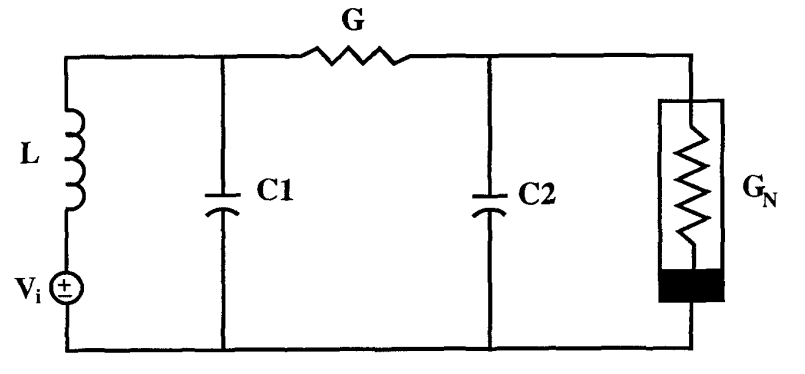

#1. Instalación e importación de librerías

In [ ]:
!pip install ddeint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pylab import array, linspace, subplots
from ddeint import ddeint
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import cosh
from sympy import sinh
import pandas as pd
from scipy import integrate
import ipywidgets as ipw
from pylab import *
from scipy.integrate import odeint
from matplotlib import pyplot 
from scipy.integrate import solve_ivp #Solo para comprobar que el método Euler funciona (deben ser iguales)
%matplotlib inline

#2. Definición del método Euler

En matemática y computación, el método de Euler, llamado así en honor a Leonhard Euler, es un procedimiento de integración numérica para resolver ecuaciones diferenciales ordinarias (EDO) a partir de un valor inicial dado. El método de Euler es el más simple de los métodos numéricos para resolver un problema de valor inicial, y el más simple de los Métodos de Runge-Kutta.

In [ ]:
#DEFINICIÓN METODO EULER
def Euler(func, X0, t):
    """
    Euler solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    x1,x2,x3 = X0
    for i in range(nt-1):
        X[i+1] = X[i] + func(X[i], t[i]) * dt
    return X

#3. Análisis de sistema sin control del atractor caótico

En este punto se simulará el sistema caótico sin control para observar su comportamiento, se utilizarán dos métodos: Uno con la librería "scipy.integrate" y otro con el método Euler definido previamente.

##3.1. Método solve_ivp

In [ ]:
a = 0.6 #Se declaran las constantes a, b, c, alpha y beta.
b = -1.1
c = 0.45

A = 12.8
B = 19.1

In [ ]:
t_in=0                                        #Se define un tiempo inicial
t_fin=100                                     #Se define un tiempo final

tspam = [t_in,t_fin]
t=np.linspace(t_in,t_fin,100000)               #Se crea un vector de tiempo con pasos de 0.0001s para obtener una simulación detallada


vall0 = [0, 0, 0.001]                         #Se definen valores iniciales para el sistema, en este caso de 0, 0 y 0.001
def fun (t, Vall):                            #Se define el sistema
  x,y,z = Vall                                #Se definen las variables x, y, z
  X = A*(y-(a*x)-(b*x**2)-(c*x**3))           #X punto
  Y = x-y+z                                   #Y punto
  Z = -B*y                                    #Z punto
  return [X,Y,Z]



sol = solve_ivp(fun, tspam, vall0, t_eval=t)  #Se utiliza solve_ivp de la librería scipy.integrate para resolver la ODE

import time                                   #Las siguientes 3 líneas de código son para imprimir el tiempo que tarda en compilar, esto se analizará más adelante en el método Euler
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

--- 5.1975250244140625e-05 seconds ---


Text(0.5, 0, 't')

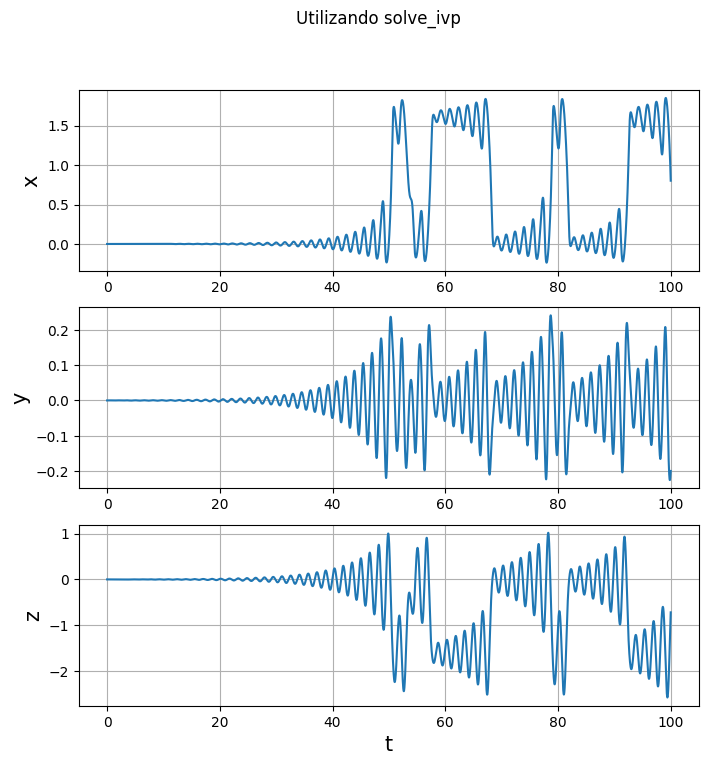

In [ ]:
fig, axs = plt.subplots(3, figsize=(8, 8))    #Se crea un subplot para ver el comportamiento en el tiempo
fig.suptitle("Utilizando solve_ivp")


axs[0].plot(sol.t, sol.y[0])                  #Se plotea X punto en el tiempo
axs[0].grid()
axs[0].set_ylabel('x', fontsize = 15.0)



axs[1].plot(sol.t, sol.y[1])                  #Se plotea Y punto en el tiempo
axs[1].grid()
axs[1].set_ylabel('y', fontsize = 15.0)


axs[2].plot(sol.t, sol.y[2])                  #Se plotea Z punto en el tiempo
axs[2].grid()
axs[2].set_ylabel('z', fontsize = 15.0)
axs[2].set_xlabel('t', fontsize = 15.0)



Obvservando las tres gráficas, se puede notar que el sistema no sigue ningún patrón en específico, teniendo como resultado un sistema caótico.

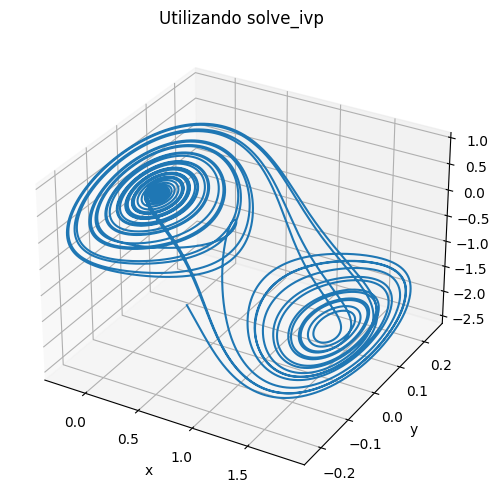

In [ ]:
fig = plt.figure(figsize=(6,6))               #Se crea otro plot para ver la interacción entre los tres estados, para esto se hace un plot en 3 dimensiones
ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2])       #Aquí se ponen las 3 ODE's
ax.set_title('Utilizando solve_ivp');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Analizando la gráfica en 3 dimensiones, claramente se ve una trayectoria parecida a la trayectoria del [sistema de Lorenz](https://es.wikipedia.org/wiki/Atractor_de_Lorenz), creando un sistema prácticamente imposible de predecir; cumpliendo con la [teoría del caos](https://es.wikipedia.org/wiki/Teoría_del_caos).

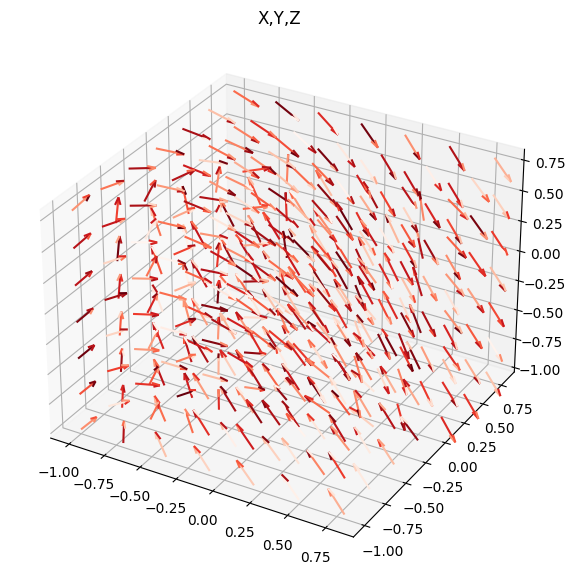

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
x = arange(-1, 1, 0.3)
y = arange(-1, 1, 0.3)
z = arange(-1, 1, 0.3)

#Retrato de fase X Y Y
x,y,z = meshgrid(x,y,z)




X = A*(y-(a*x)-(b*x**2)-(c*x**3)) 
Y = x-y+z 
Z = -B*y  


plt.title("X,Y,Z")
q = ax.quiver(x, y, z, X, Y, Z, length=0.2, cmap='Reds', normalize=True)
q.set_array(np.random.rand(np.prod(x.shape)))

plt.show()

El quiver plot tampoco tiene ningún patrón predecible, todo indica que se tiene un sistema caótico.

##3.2. Método Euler

In [ ]:
a = 0.6
b = -1.1
c = 0.45

A = 12.8
B = 19.1

In [ ]:
t_in=0
t_fin=100

tspam = [t_in,t_fin]
t=np.linspace(t_in,t_fin,100000)


vall0 = [0, 0, 0.001]
def fun (Vall, t):
  x,y,z = Vall
  X = A*(y-(a*x)-(b*x**2)-(c*x**3))
  Y = x-y+z
  Z = -B*y
  return np.array([X,Y,Z])



sol = Euler(fun, vall0, t)        #Esta línea de código es la única que diferencia ambos métodos; utilizando en este caso la función del método Euler.

import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.00010180473327636719 seconds ---


Text(0.5, 0, 't')

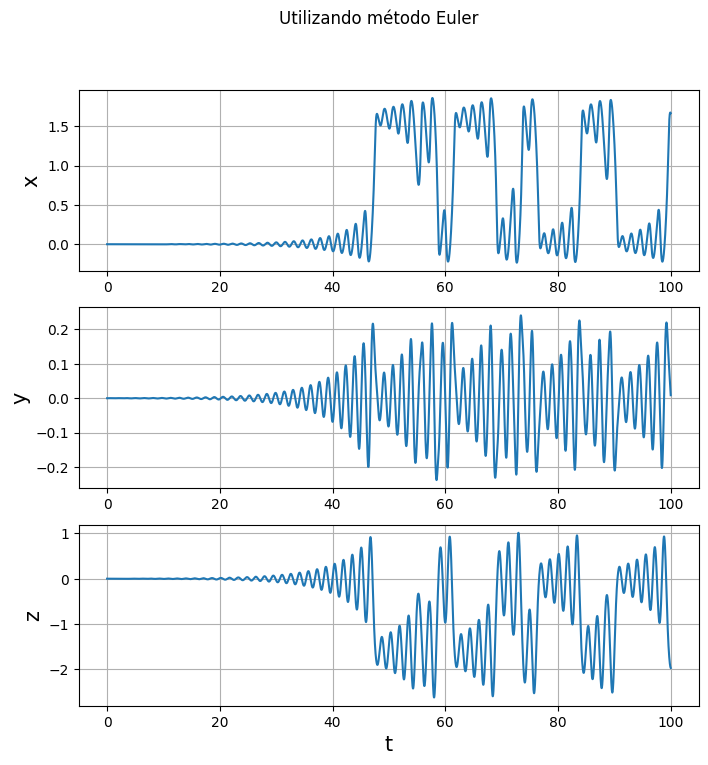

In [ ]:
fig, axs = plt.subplots(3, figsize=(8, 8))
fig.suptitle("Utilizando método Euler")


axs[0].plot(t, sol[:, 0])
axs[0].grid()
axs[0].set_ylabel('x', fontsize = 15.0)



axs[1].plot(t, sol[:, 1])
axs[1].grid()
axs[1].set_ylabel('y', fontsize = 15.0)


axs[2].plot(t, sol[:, 2])
axs[2].grid()
axs[2].set_ylabel('z', fontsize = 15.0)
axs[2].set_xlabel('t', fontsize = 15.0)



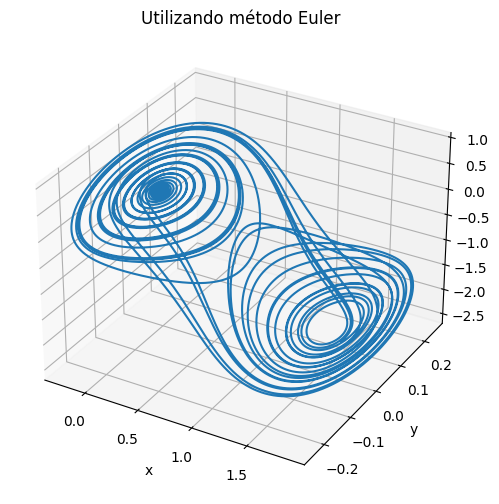

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.plot3D(sol[:, 0], sol[:, 1], sol[:, 2])
ax.set_title('Utilizando método Euler');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Analizando ambas gráficas, se pueden sacar las mismas conclusiones que con el método anterior, con la diferencia de que el método Euler es mucho más rápido que el método que requiere integración, haciendolo más efectivo para simular el sistema. Esto se puede comprobar mirando el tiempo de compilación en ambos métodos.

#4. Análisis de sistema con control del atractor caótico

En esta sección se añadirá la fuerza con el retardo de tiempo a la primera ecuación del sistema; dicho retardo convierte la [ODE](https://es.wikipedia.org/wiki/Ecuación_diferencial_ordinaria) en una [DDE](https://es.wikipedia.org/wiki/Ecuaciones_diferenciales_con_retardo#:~:text=En%20matemáticas%2C%20las%20ecuaciones%20diferenciales,la%20función%20en%20momentos%20anteriores.), por lo cual no se puede utilizar métodos númericos convencionales para resolverla como el método Euler, entonces se utilizará el solver [ddeint](https://pypi.org/project/ddeint/) basado en scipy que se basa en métodos de integración para resolver DDE's.

En este punto se utilizarán las mismas constantes que en el punto anterior, la fuerza de la retroalimentación $K$ también será constante e igual a $-6$; el valor que cambia en este caso será el retardo del tiempo $\tau$, el cual tendrá distintos valores para comparar la respuesta del sistema.

También se toman en cuenta y se utilizan los diferentes puntos de equilibrio del sistema: $S_0(0,0,0)$, $\;S_1(0.8216,0,-0.8216)$ y $\;S_2(1.6228,0,-1.6228)$.

##4.1. $\tau = 0.021$

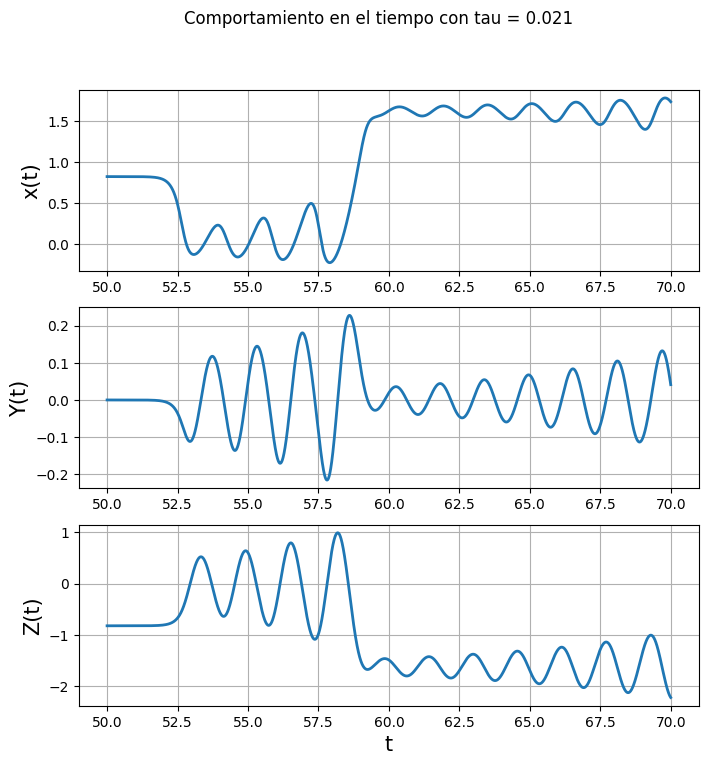

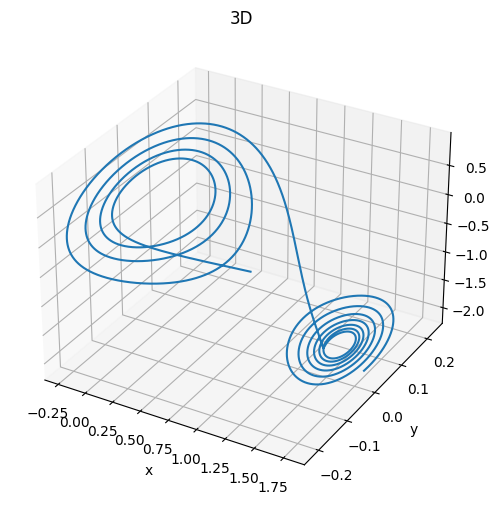

In [ ]:
#Tau = 0.021, The equilibrium is unstable and chaos still exists
K = -6                                                                    #Fuerza de la retroalimentación
A = 12.8                                                                  #Constantes alpha, beta, a, b, c
B = 19.1
a = 0.6
b = -1.1
c = 0.45
tau = 0.021                                                               #Valor de tau

def model(Y, t, tau):                                                     #Modelado del sistema con retardo
    x, y, z = Y(t)
    xd, yd, zd = Y(t - tau)                                               #Variables x, y, z con retardo. Solo se utilizará la variable x
    return array([A*(y-(a*x)-(b*x**2)-(c*x**3))+K*(x-xd), x-y+z, -B*y])   #Sistema


g = lambda t: array([0.8216, 0, -0.8216])                                 #Valores iniciales
t_in=50                                                                   #Tiempo inicial
t_fin=70                                                                  #Tiempo final

tspam = [t_in,t_fin]
tt=np.linspace(t_in,t_fin,100000)                                         #Tiempo con pasos de 0.00001s


fig, axs = plt.subplots(3, figsize=(8, 8))                                #Subplot para respuestas en el tiempo
fig.suptitle("Comportamiento en el tiempo con tau = 0.021")


yy = ddeint(model, g, tt, fargs=(tau,))                                   #Se resuelve el sistema con ddeint


axs[0].plot(tt, yy[:, 0], lw=2, label="x(t)")                             #Plot para X
axs[0].grid()
axs[0].set_ylabel('x(t)', fontsize = 15.0)


axs[1].plot(tt, yy[:, 1], lw=2, label="y(t)")                             #Plot para Y
axs[1].grid()
axs[1].set_ylabel('Y(t)', fontsize = 15.0)


axs[2].plot(tt, yy[:, 2], lw=2, label="z(t)")                             #Plot para Z
axs[2].grid()
axs[2].set_ylabel('Z(t)', fontsize = 15.0)
axs[2].set_xlabel('t', fontsize = 15.0)


fig = plt.figure(figsize=(6,6))                                           #Plot en 3D para ver como interactúa el sistema
ax = plt.axes(projection='3d')
ax.plot3D(yy[:, 0], yy[:, 1], yy[:, 2])
ax.set_title('3D');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Como se puede observar, el sistema sigue siendo inestable y aún hay existencia de caos para $\tau = 0.021$. 

##4.2. $\tau = 0.092$

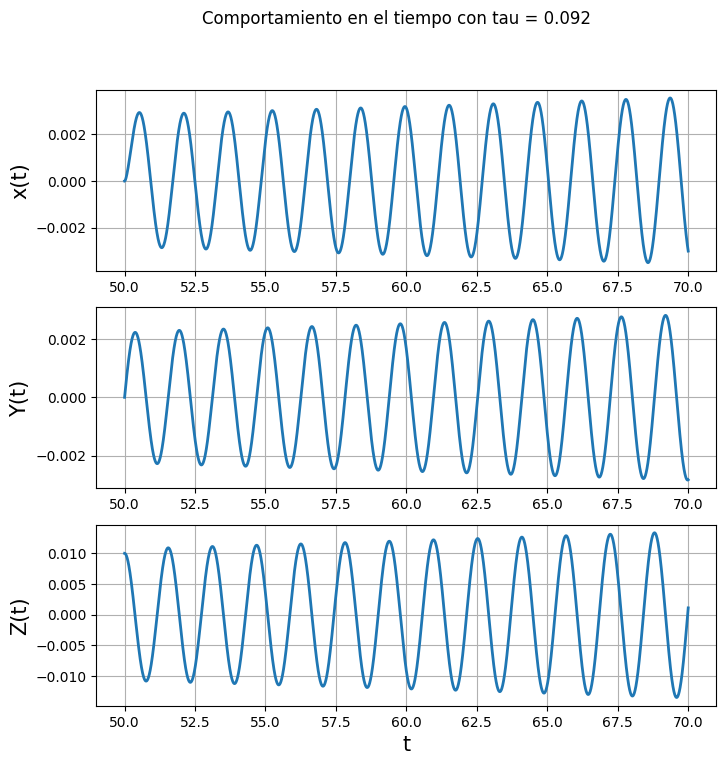

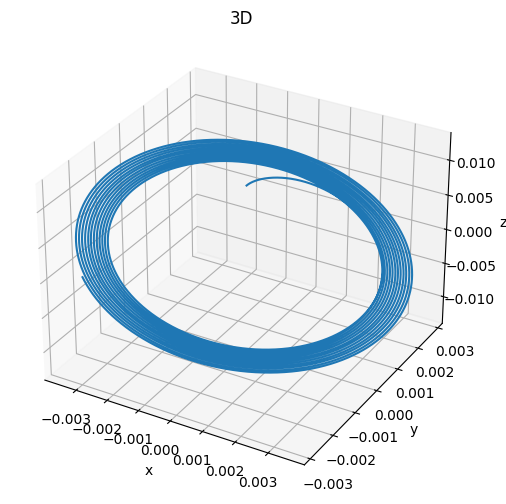

In [ ]:
#Tau = 0.092, Chaos vanishes and a stable periodic solution bifurcates from the equilibrium

tau = 0.092


g = lambda t: array([0, 0, 0.01])                                         #Valores iniciales


fig, axs = plt.subplots(3, figsize=(8, 8))                                #Subplot para respuestas en el tiempo
fig.suptitle("Comportamiento en el tiempo con tau = 0.092")


yy = ddeint(model, g, tt, fargs=(tau,))                                   #Se resuelve el sistema con ddeint


axs[0].plot(tt, yy[:, 0], lw=2, label="x(t)")                             #Plot para X
axs[0].grid()
axs[0].set_ylabel('x(t)', fontsize = 15.0)


axs[1].plot(tt, yy[:, 1], lw=2, label="y(t)")                             #Plot para Y
axs[1].grid()
axs[1].set_ylabel('Y(t)', fontsize = 15.0)


axs[2].plot(tt, yy[:, 2], lw=2, label="z(t)")                             #Plot para Z
axs[2].grid()
axs[2].set_ylabel('Z(t)', fontsize = 15.0)
axs[2].set_xlabel('t', fontsize = 15.0)


fig = plt.figure(figsize=(6,6))                                           #Plot en 3D para ver como interactúa el sistema
ax = plt.axes(projection='3d')
ax.plot3D(yy[:, 0], yy[:, 1], yy[:, 2])
ax.set_title('3D');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Como se puede observar, el caos desaparece y una solución estable y periódica aparece para $\tau = 0.092$, cumpliendo el objetivo de controlar el caos en el circuito.

Es importante recordar que la [estabilidad](https://www.britannica.com/science/stability-solution-of-equations) en matemáticas, es una condición en donde perturbaciones pequeñas en el sistema no produce un efecto muy disruptor en el sistema. En términos de solución de una ecuación, una función $f(x)$ es estable si cualquier otra solución de la ecuación que empieza lo suficientemente cerca de $x=0$ se queda cerca para los siguientes valores de $x$. 

Básicamente, aquí aparece una [bifurcación Hopf](https://en.wikipedia.org/wiki/Hopf_bifurcation#:~:text=up%20to%20order%20.-,Definition%20of%20a%20Hopf%20bifurcation,conjugate%20nonzero%20purely%20imaginary%20eigenvalues.); ya que la estabilidad del sistema cambió de inestable a estable y aparece una solución periódica.

##4.3. $\tau = 0.15$

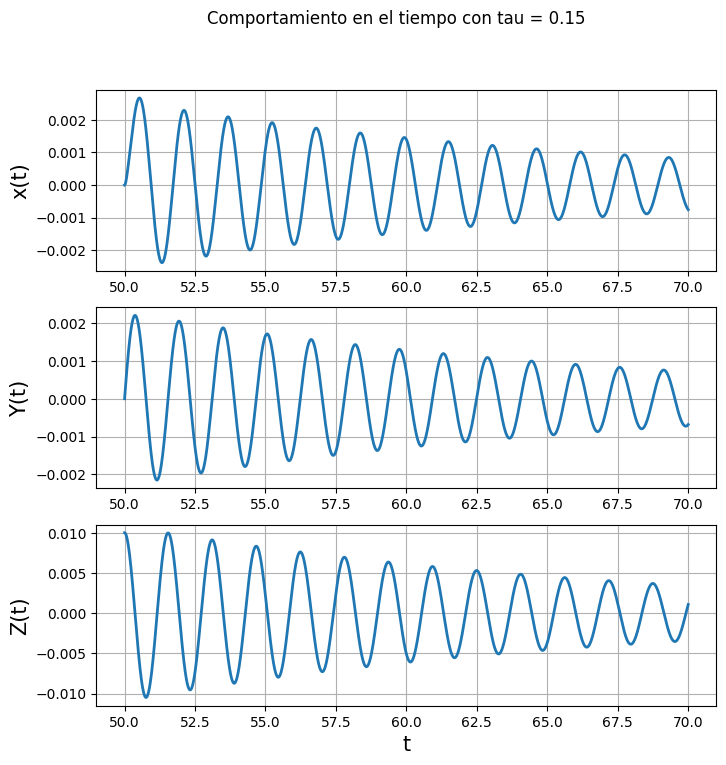

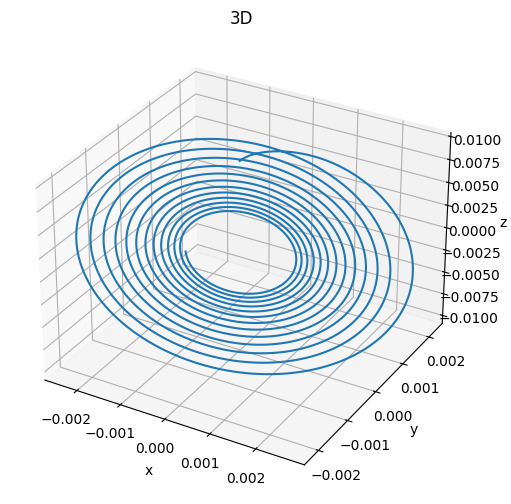

In [ ]:
#Tau = 0.15, Chaos vanishes and equilibrium becomes local asymptotically stable

tau = 0.15


g = lambda t: array([0, 0, 0.01])                                         #Valores iniciales


fig, axs = plt.subplots(3, figsize=(8, 8))                                #Subplot para respuestas en el tiempo
fig.suptitle("Comportamiento en el tiempo con tau = 0.15")


yy = ddeint(model, g, tt, fargs=(tau,))                                   #Se resuelve el sistema con ddeint


axs[0].plot(tt, yy[:, 0], lw=2, label="x(t)")                             #Plot para X
axs[0].grid()
axs[0].set_ylabel('x(t)', fontsize = 15.0)


axs[1].plot(tt, yy[:, 1], lw=2, label="y(t)")                             #Plot para Y
axs[1].grid()
axs[1].set_ylabel('Y(t)', fontsize = 15.0)


axs[2].plot(tt, yy[:, 2], lw=2, label="z(t)")                             #Plot para Z
axs[2].grid()
axs[2].set_ylabel('Z(t)', fontsize = 15.0)
axs[2].set_xlabel('t', fontsize = 15.0)


fig = plt.figure(figsize=(6,6))                                           #Plot en 3D para ver como interactúa el sistema
ax = plt.axes(projection='3d')
ax.plot3D(yy[:, 0], yy[:, 1], yy[:, 2])
ax.set_title('3D');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Observando las gráficas, se puede notar que el caos también desaparece y el sistema se vuelve asintóticamente estable localmente para $\tau = 0.15$.

Es importante recordar que una función es asintóticamente estable cuando la solución se acerca a 0 mientras incrementa el tiempo.

##4.4. $\tau = 1.725$

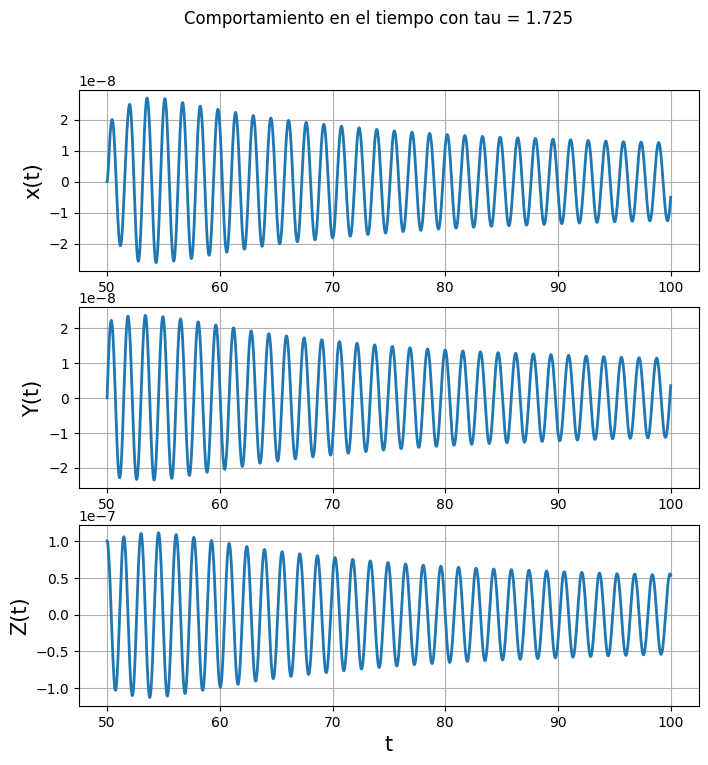

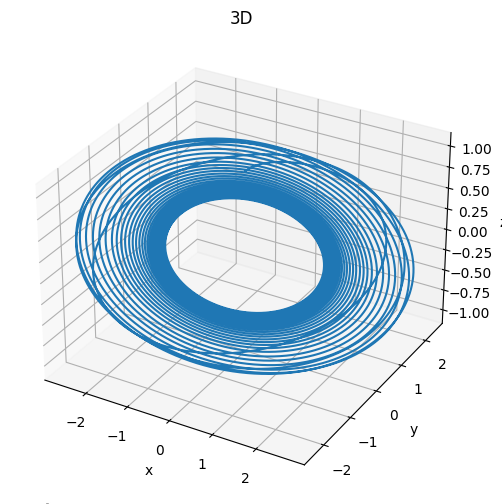

In [ ]:
#Tau = 1.725, Chaos vanishes and a stable periodic solution bifurcates from the equilibrium

tau = 1.725


g = lambda t: array([0, 0, 0.0000001])                                     #Valores iniciales

t_in=50                                                                    #Tiempo inicial
t_fin=100                                                                  #Tiempo final

tspam = [t_in,t_fin]
tt=np.linspace(t_in,t_fin,100000)     

fig, axs = plt.subplots(3, figsize=(8, 8))                                #Subplot para respuestas en el tiempo
fig.suptitle("Comportamiento en el tiempo con tau = 1.725")


yy = ddeint(model, g, tt, fargs=(tau,))                                   #Se resuelve el sistema con ddeint
 

axs[0].plot(tt, yy[:, 0], lw=2, label="x(t)")                             #Plot para X
axs[0].grid()
axs[0].set_ylabel('x(t)', fontsize = 15.0)


axs[1].plot(tt, yy[:, 1], lw=2, label="y(t)")                             #Plot para Y
axs[1].grid()
axs[1].set_ylabel('Y(t)', fontsize = 15.0)


axs[2].plot(tt, yy[:, 2], lw=2, label="z(t)")                             #Plot para Z
axs[2].grid()
axs[2].set_ylabel('Z(t)', fontsize = 15.0)
axs[2].set_xlabel('t', fontsize = 15.0)


fig = plt.figure(figsize=(6,6))                                           #Plot en 3D para ver como interactúa el sistema
ax = plt.axes(projection='3d')
ax.plot3D(yy[:, 0], yy[:, 1], yy[:, 2])
ax.set_title('3D');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Como se puede observar, aquí también desaparece el caos y una solución periódica estable bifurca del sistema con $\tau = 1.725$.

##4.5. $\tau = 7.5$

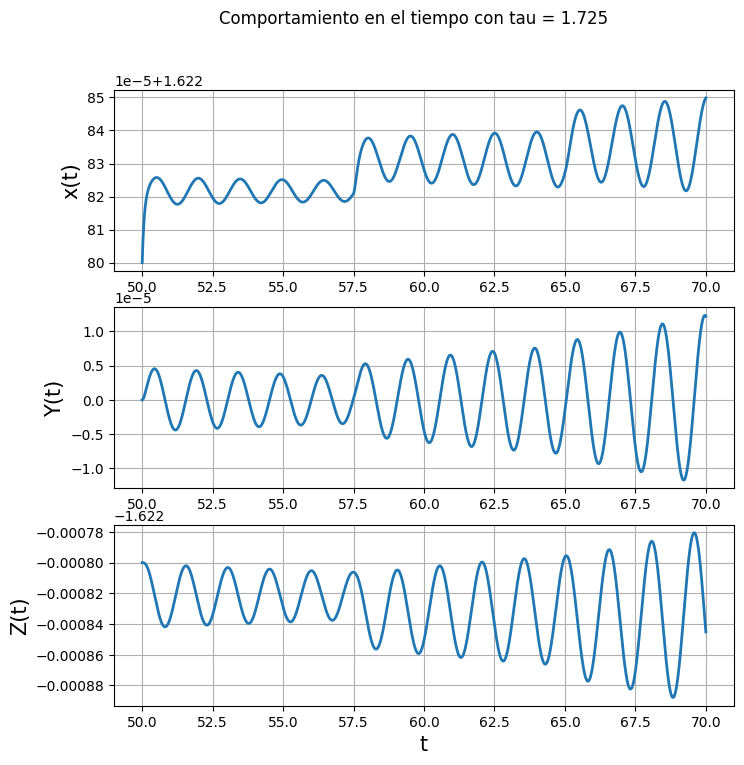

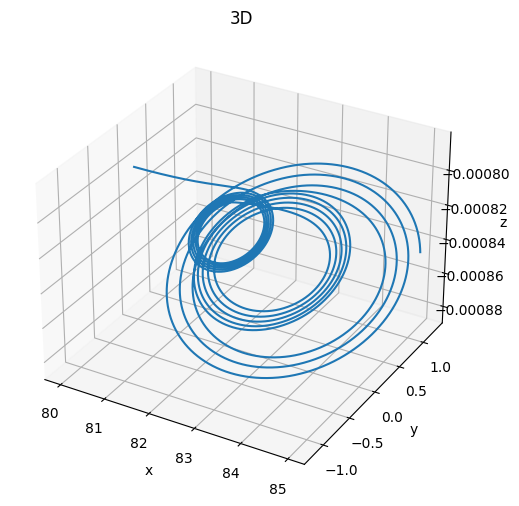

In [ ]:
#Tau = 7.5, Chaos appears again

tau = 7.5


g = lambda t: array([1.6228, 0, -1.6228])                                 #Valores iniciales

t_in=50                                                                    #Tiempo inicial
t_fin=70                                                                  #Tiempo final

tspam = [t_in,t_fin]
tt=np.linspace(t_in,t_fin,100000)     


fig, axs = plt.subplots(3, figsize=(8, 8))                                #Subplot para respuestas en el tiempo
fig.suptitle("Comportamiento en el tiempo con tau = 1.725")


yy = ddeint(model, g, tt, fargs=(tau,))                                   #Se resuelve el sistema con ddeint


axs[0].plot(tt, yy[:, 0], lw=2, label="x(t)")                             #Plot para X
axs[0].grid()
axs[0].set_ylabel('x(t)', fontsize = 15.0)


axs[1].plot(tt, yy[:, 1], lw=2, label="y(t)")                             #Plot para Y
axs[1].grid()
axs[1].set_ylabel('Y(t)', fontsize = 15.0)


axs[2].plot(tt, yy[:, 2], lw=2, label="z(t)")                             #Plot para Z
axs[2].grid()
axs[2].set_ylabel('Z(t)', fontsize = 15.0)
axs[2].set_xlabel('t', fontsize = 15.0)


fig = plt.figure(figsize=(6,6))                                           #Plot en 3D para ver como interactúa el sistema
ax = plt.axes(projection='3d')
ax.plot3D(yy[:, 0], yy[:, 1], yy[:, 2])
ax.set_title('3D');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Ahora, cuando $\tau$ tiene un valor muy elevado, el caos reaparece.

#5. Conclusiones



*   Se lograron representar las simulaciones del documento original numéricamente, analizando el comportamiento de cada una.
*   La retroalimentación añadida eliminó el atractor caótico de forma exitosa y se analizaron los valores apropiados para dicha retroalimentación.
*   El circuito de Chua sigue siendo un sistema prototipo, por lo tanto se propone analizar circuitos aplicados en futuros documentos para ver el efecto de la supresión del carácter caótico utilizando una retroalimentación retardada.



#6. Referencias



*   https://www.sciencedirect.com/science/article/abs/pii/S0960077915001642
*   https://es.wikipedia.org/wiki/Atractor_de_Lorenz
*   https://es.wikipedia.org/wiki/Teoría_del_caos
*   https://es.wikipedia.org/wiki/Ecuación_diferencial_ordinaria
*   https://es.wikipedia.org/wiki/Ecuaciones_diferenciales_con_retardo#:~:text=En%20matemáticas%2C%20las%20ecuaciones%20diferenciales,la%20función%20en%20momentos%20anteriores.
*   https://www.britannica.com/science/stability-solution-of-equations
*   https://en.wikipedia.org/wiki/Hopf_bifurcation#:~:text=up%20to%20order%20.-,Definition%20of%20a%20Hopf%20bifurcation,conjugate%20nonzero%20purely%20imaginary%20eigenvalues.
*   https://www.sciencedirect.com/science/article/pii/S2090447920300150#:~:text=The%20equilibrium%20point%20of%20a,pair%20of%20purely%20imaginary%20eigenvalues.
*   http://www.scholarpedia.org/article/Fold-Hopf_bifurcation
*   https://www.ugr.es/~ecuadif/files/gutithesis.pdf

